In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import cv2



In [21]:

# Spécifier le chemin
annotations_path = "annotations.csv"
candidates_path = "candidates.csv"

# Charger les fichiers
annotations = pd.read_csv(annotations_path)
candidates = pd.read_csv(candidates_path)

# Afficher les premières lignes
#annotations.head()
# print(annotations.head())
candidates.head()



,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [23]:
annotations.head()


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [25]:
print("Informations sur les annotations :")
print(annotations.info())

print("\nInformations sur les candidats :")
print(candidates.info())


Informations sur les annotations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seriesuid    1186 non-null   object 
 1   coordX       1186 non-null   float64
 2   coordY       1186 non-null   float64
 3   coordZ       1186 non-null   float64
 4   diameter_mm  1186 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB
None

Informations sur les candidats :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551065 entries, 0 to 551064
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   seriesuid  551065 non-null  object 
 1   coordX     551065 non-null  float64
 2   coordY     551065 non-null  float64
 3   coordZ     551065 non-null  float64
 4   class      551065 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 21.0+ MB
None


In [27]:
#Statistique general
print(annotations.describe())
print(candidates.describe())


            coordX       coordY       coordZ  diameter_mm
count  1186.000000  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029     8.306527
std      84.468115    98.316003   279.829437     4.762033
min    -164.351031  -283.834336  -790.074799     3.253443
25%     -80.909225   -51.549643  -221.197808     5.107177
50%     -32.855132    18.787926  -167.615160     6.433600
75%      76.830069    67.245915  -109.735281     9.696301
max     164.763985   271.405521  1790.494057    32.270030
              coordX         coordY         coordZ          class
count  551065.000000  551065.000000  551065.000000  551065.000000
mean       -2.005825       8.944721    -157.857852       0.002452
std        71.711619      89.428035     277.212320       0.049453
min      -201.113500    -317.330000    -895.220000       0.000000
25%       -62.126786     -35.780058    -224.790000       0.000000
50%       -17.271143      19.610000    -172.405402       0.000000
75%        61.87

In [29]:
print("Valeurs manquantes dans annotations :\n", annotations.isnull().sum())
print("\nValeurs manquantes dans candidates :\n", candidates.isnull().sum())


Valeurs manquantes dans annotations :
 seriesuid      0
coordX         0
coordY         0
coordZ         0
diameter_mm    0
dtype: int64

Valeurs manquantes dans candidates :
 seriesuid    0
coordX       0
coordY       0
coordZ       0
class        0
dtype: int64


In [7]:
nodule_counts = annotations['seriesuid'].value_counts()
noduleserie= annotations['seriesuid'].value()
print("Nombre de nodules par scan :\n", nodule_counts)


AttributeError: 'Series' object has no attribute 'value'

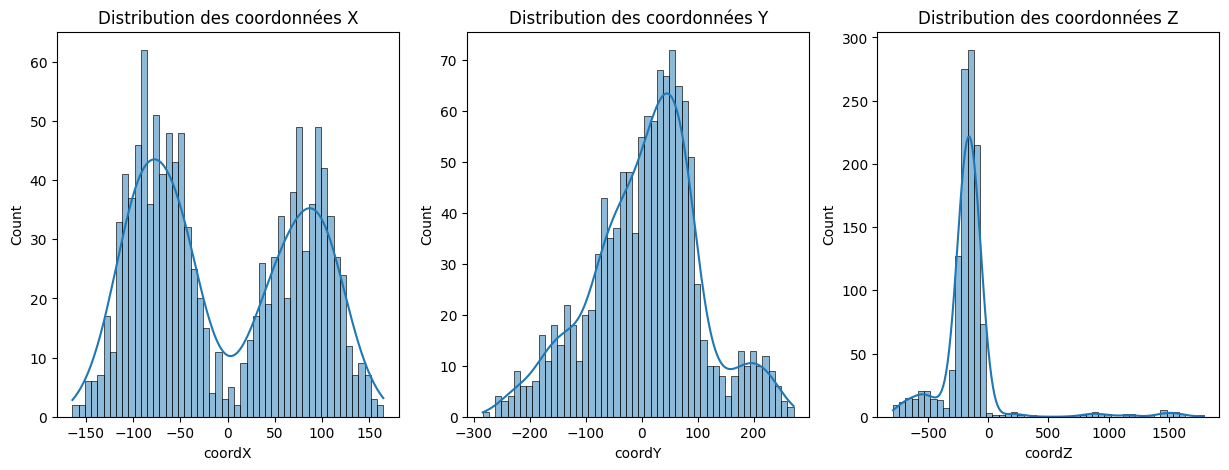

In [31]:
# On analyse la distribution des coordonnées X, Y et Z des nodules.
# permet de placer les coordonnée dans lespace 


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(annotations['coordX'], bins=50, kde=True)
plt.title("Distribution des coordonnées X")

plt.subplot(1,3,2)
sns.histplot(annotations['coordY'], bins=50, kde=True)
plt.title("Distribution des coordonnées Y")

plt.subplot(1,3,3)
sns.histplot(annotations['coordZ'], bins=50, kde=True)
plt.title("Distribution des coordonnées Z")

plt.show()


In [33]:
# Fonction pour rechercher une ligne par seriesuid
def find_annotation_by_seriesuid(seriesuid):
    result = annotations[annotations['seriesuid'] == seriesuid]
    if result.empty:
        print(f"Aucune annotation trouvée pour seriesuid: {seriesuid}")
    else:
        print(result)

# Exemple d'utilisation
seriesuid_to_search ="1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"
find_annotation_by_seriesuid(seriesuid_to_search)

                                           seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  


In [35]:
# Visualisation d'un Scan et de ses Nodules


# # Charger un scan CT
# def load_ct_scan(scan_path):
#     image = sitk.ReadImage(scan_path)
#     image_array = sitk.GetArrayFromImage(image)  # Convertir en numpy array
#     return image_array

# # Spécifier un fichier .mhd
# scan_file = "DatasetLuna/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd"
# scan = load_ct_scan(scan_file)

# # Afficher une coupe du scan avec un nodule
# plt.imshow(scan[len(scan)//2], cmap="gray")
# plt.scatter(annotations.iloc[0][1], annotations.iloc[0][2], c="red", marker="x")
# plt.axis('off')
# plt.show()


# Vérification des colonnes du fichier annotations.csv
print(annotations.columns)

# Charger un scan CT
def load_ct_scan(scan_path):
    """Charge un scan médical .mhd et retourne un array NumPy"""
    image = sitk.ReadImage(scan_path)
    image_array = sitk.GetArrayFromImage(image)  # Convertir en numpy array
    return image_array

# Spécifier un fichier .mhd
scan_file = "DatasetLuna/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd"
scan = load_ct_scan(scan_file)

# Vérifier la structure des annotations pour trouver un nodule correspondant
nodule_info = annotations.iloc[0]  # Prend la première annotation

# Accéder aux coordonnées correctes
x_nodule = nodule_info['coordX']
y_nodule = nodule_info['coordY']
z_nodule = int(nodule_info['coordZ'])

# Vérifier que l'index Z est valide dans l'image
if 0 <= z_nodule < scan.shape[0]:
    plt.imshow(scan[z_nodule], cmap="gray")  # Afficher la tranche correspondant au nodule
    plt.scatter(x_nodule, y_nodule, c="red", marker="x")  # Marquer la position du nodule
    plt.axis('off')
    plt.title(f"Visualisation du nodule - Coupe Z: {z_nodule}")
    plt.show()
else:
    print(f"Erreur: L'index Z ({z_nodule}) est hors des limites de l'image (0-{scan.shape[0]-1}).")


Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm'], dtype='object')
Erreur: L'index Z (-298) est hors des limites de l'image (0-193).


In [37]:
scan.shape

(194, 512, 512)

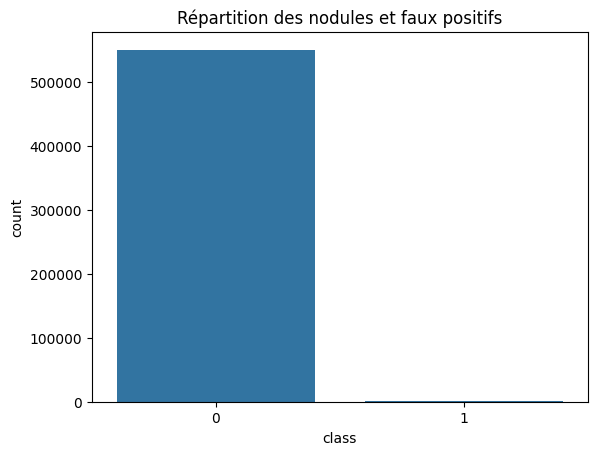

In [39]:
sns.countplot(x="class", data=candidates)
plt.title("Répartition des nodules et faux positifs")
plt.show()


In [ ]:
# pip install SimpleITK


In [ ]:
# pip install opencv-python


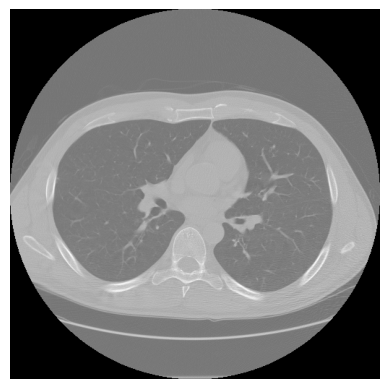

In [41]:


# Charger un scan CT
def load_ct_scan(scan_path):
    image = sitk.ReadImage(scan_path)
    image_array = sitk.GetArrayFromImage(image)  # Convertir en numpy array
    return image_array

# Spécifier un fichier .mhd
scan_file = "DatasetLuna/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd"
scan = load_ct_scan(scan_file)

# Afficher une coupe axiale
def show_scan_slice(scan, slice_idx):
    plt.imshow(scan[slice_idx], cmap="gray")
    plt.axis('off')
    plt.show()

# Afficher la coupe du milieu
show_scan_slice(scan, len(scan) // 2)


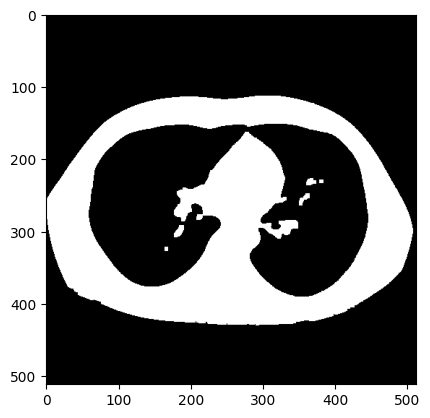

In [43]:


def segment_lungs(image):
    _, binary = cv2.threshold(image, -600, 255, cv2.THRESH_BINARY)  # Seuillage
    kernel = np.ones((5,5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)  # Nettoyage
    return binary

lung_mask = segment_lungs(scan[len(scan)//2])
plt.imshow(lung_mask, cmap='gray')
plt.show()


TypeError: Invalid shape (0, 32, 32) for image data

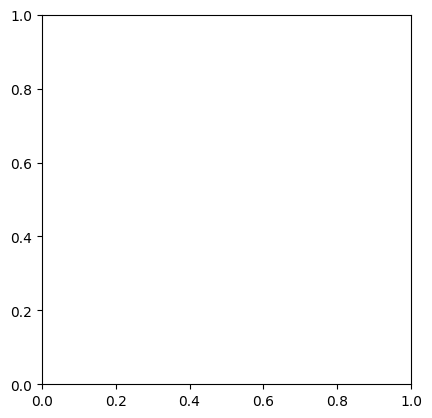

In [45]:
def extract_nodule_patch(scan, x, y, z, size=32):
    start_x, start_y, start_z = int(x-size//2), int(y-size//2), int(z-size//2)
    return scan[start_z:start_z+size, start_y:start_y+size, start_x:start_x+size]

nodule = extract_nodule_patch(scan, annotations.iloc[0]['coordX'], annotations.iloc[0]['coordY'], annotations.iloc[0]['coordZ'])
plt.imshow(nodule, cmap='gray')
plt.show()
